# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Volume renderings in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [2]:
from lightning import Lightning

from colorsys import hsv_to_rgb
from numpy import random, asarray, amin, amax, clip, mean, ndarray, linspace
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap 

## Connect to server


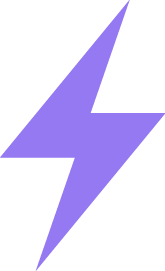

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [6]:
lgn = Lightning(ipython=True)

## <hr> Clouds

Volume rendering lets you render a sequence of images as a 3D volume.
<br>
Lightining currently assumes isotropic images, so the sampling in x,y, and z should be comparable.
<br>
To render a volume that looks like sky, first we generate some smooth gaussian noise, and scale and clip it to increase the contrast.

In [4]:
mat = gaussian_filter(random.rand(25,25,50),3)
mat = (mat - amin(mat)) / (amax(mat) - amin(mat))
mat = clip(((mat - 0.5)*10 + 0.25), 0, 1)
cm = LinearSegmentedColormap.from_list('sky', ['#7AB2EA',  'white'])

Now render as a volume

In [7]:
slices = [cm(im) for im in mat]
lgn.volume(slices)

## <hr> Color cubes

Volumes are a useful way to visualize color spaces. First we'll generate RGB and HSV cubes.

In [8]:
nx, ny, nz = (50, 50, 50)
rgb = ndarray((nx,ny,nz,3))
hsv = ndarray((nx,ny,nz,3))
for i, ii in enumerate(linspace(0,1,nx)):
    for j, jj in enumerate(linspace(0,1,ny)):
        for k, kk in enumerate(linspace(0,1,nz)):
            position = (i, j, k)
            rgb[position] = (kk, jj, ii)
            hsv[position] = hsv_to_rgb(jj, ii, kk)

Render RGB cube

In [9]:
lgn.volume([x for x in rgb])

Render HSV cube

In [9]:
lgn.volume([x for x in hsv])

## <hr> Seaborn colormaps

Let's render one of seaborn's colormaps in 3D.

In [10]:
mat = gaussian_filter(random.rand(25,25,50),2.5)
mat = (mat - amin(mat)) / (amax(mat) - amin(mat))
mat = clip(((mat - 0.5)*3 + 0.25), 0, 1)

Define a color map, create the slices, then render the volume. Try it with your favorite colormap!

In [11]:
cm = sns.diverging_palette(10, 220, sep=80, n=7, as_cmap=True)

In [13]:
slices = [cm(x)[:,:,0:3] for x in mat]
lgn.volume(slices)